In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.svm import SVR
import pickle

In [2]:
df = pd.read_csv(".\dataset\pmsm_temperature_data.csv")
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


# EDA

In [3]:
df.shape

(998070, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [5]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [6]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [7]:
columns = ["stator_yoke","stator_winding","stator_tooth","torque","pm","profile_id"]


def unique_values_count(cols):
    for i in cols:
        print("Column name: {}, Unique value count: {}".format(i,len(df[i].unique())))
        

unique_values_count(columns)

Column name: stator_yoke, Unique value count: 861836
Column name: stator_winding, Unique value count: 899142
Column name: stator_tooth, Unique value count: 854787
Column name: torque, Unique value count: 695029
Column name: pm, Unique value count: 945166
Column name: profile_id, Unique value count: 52


In [8]:
columns = ["stator_yoke","stator_winding","stator_tooth","torque","pm","profile_id"]

def unique_values_len(cols):
    for i in cols:
        print("Column name: {}".format(i))
        print(df[i].value_counts())
        print()
        
unique_values_len(columns)

Column name: stator_yoke
-0.397535    12779
-0.734725    12006
 0.951223     7448
-1.746294     7069
 1.291047     2696
             ...  
-0.220158        1
-0.220314        1
-0.220589        1
-0.221065        1
 0.987163        1
Name: stator_yoke, Length: 861836, dtype: int64

Column name: stator_winding
 1.261606    15548
-0.976923     4943
 0.017978     2972
 0.268647     1405
-1.225649     1341
             ...  
 0.514877        1
 0.514841        1
 0.514583        1
 0.514419        1
 0.489382        1
Name: stator_winding, Length: 899142, dtype: int64

Column name: stator_tooth
 0.461858    10954
-1.067903     9478
-0.761951     8642
 1.991620     6465
-1.985760     5990
             ...  
 0.985829        1
 0.986969        1
 0.988690        1
 0.991214        1
 0.828046        1
Name: stator_tooth, Length: 854787, dtype: int64

Column name: torque
-0.255640    183291
 0.371283     16150
 0.057822     10864
 1.311668      6834
 1.625130      6428
              ...  
 0.

C:\Python3101\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python3101\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python3101\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

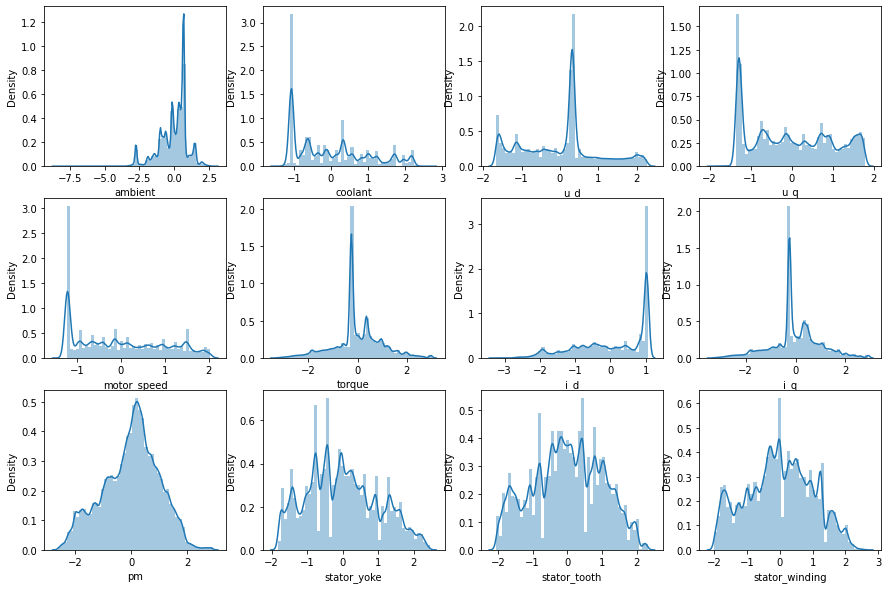

In [9]:
plt.figure(figsize = (15,10))

for i in range(len(df.columns)-1):
    plt.subplot(3,4,i+1)
    sns.distplot(df.iloc[:,i])
    
plt.show()


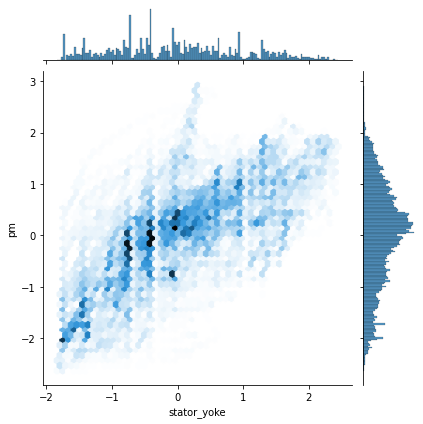

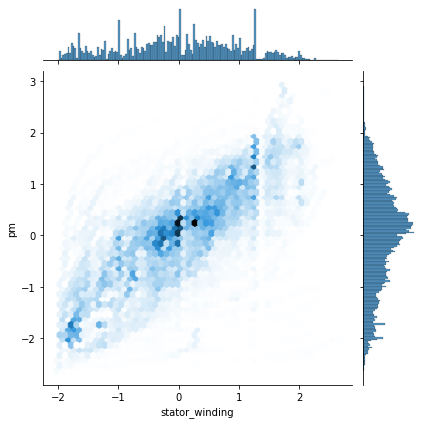

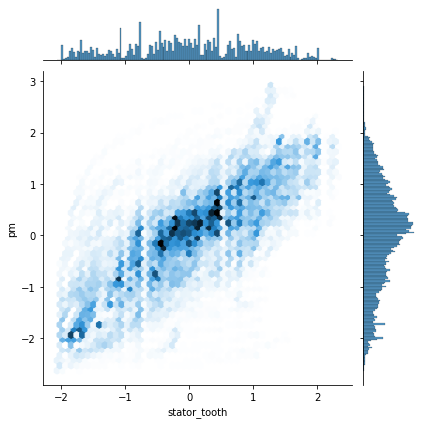

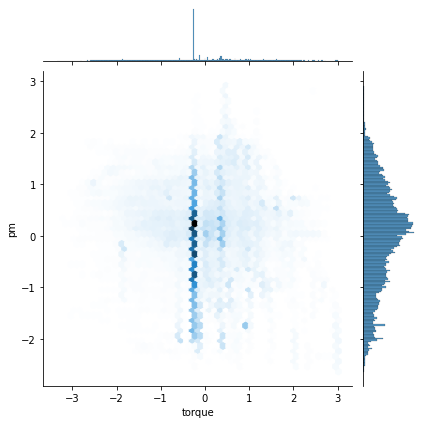

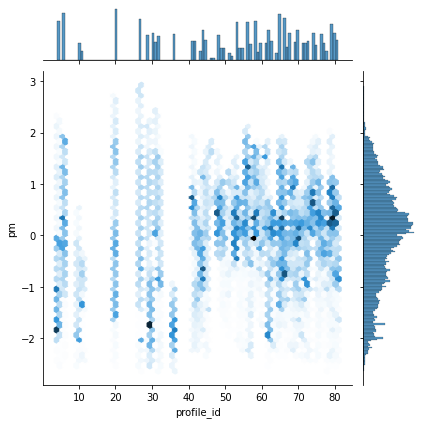

In [10]:
cols = ["stator_yoke","stator_winding","stator_tooth","torque","profile_id"]
for i in cols:
    sns.jointplot(x = i,y = "pm",data = df,kind = "hex")

C:\Python3101\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python3101\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python3101\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python3101\lib\site-packages\seaborn\_decorators.py:36: Futur

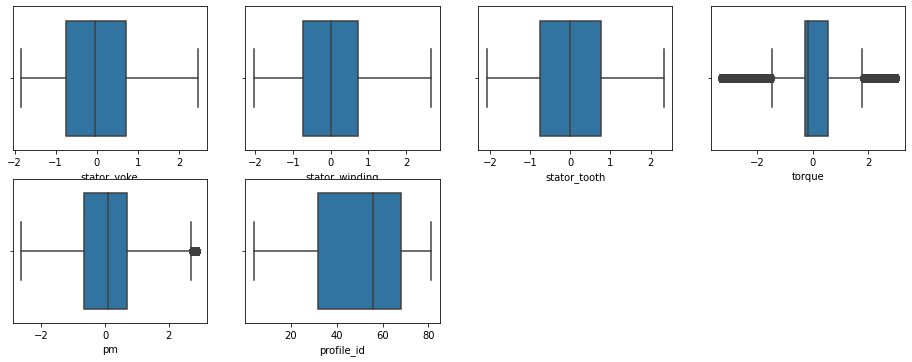

In [11]:
plt.figure(figsize = (16,9))
num = 0
for i in columns:
    plt.subplot(3,4,num+1)
    sns.boxplot(df[i])
    num += 1
plt.show()

<AxesSubplot:>

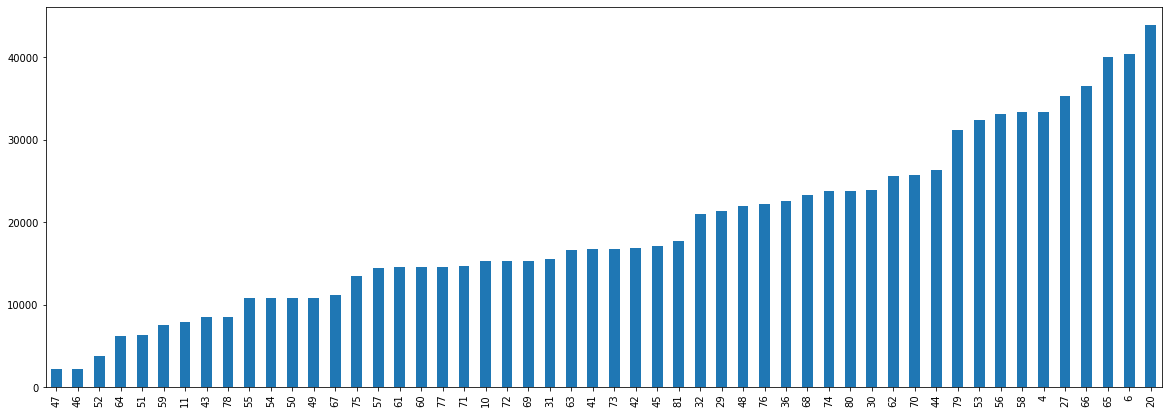

In [12]:
plt.figure(figsize = (20,7))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

<AxesSubplot:>

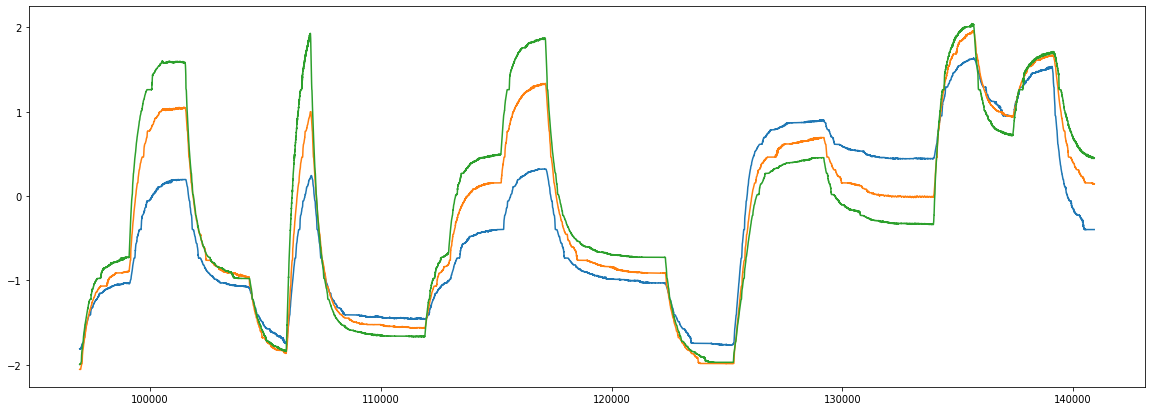

In [13]:
plt.figure(figsize = (20,7))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')

<AxesSubplot:>

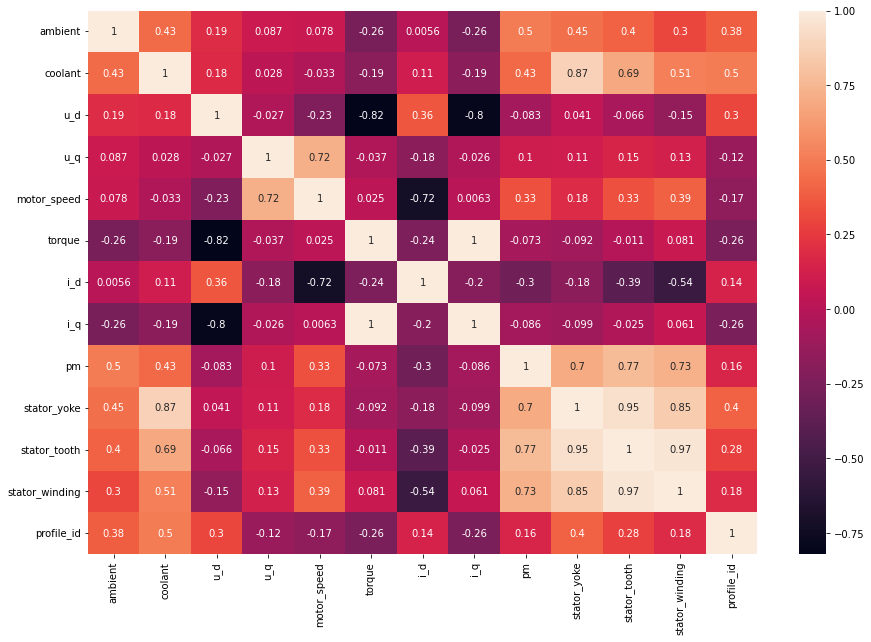

In [14]:
figure, axes = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,ax = axes)

# Training model

In [30]:
x = df.drop(["pm","stator_yoke","stator_tooth","stator_winding","profile_id","torque"],axis = 1).values
x.shape


(998070, 7)

In [31]:
y = df.iloc[:,[8]].values
y

array([[-2.522071  ],
       [-2.5224178 ],
       [-2.5226731 ],
       ...,
       [ 0.4294391 ],
       [ 0.42955777],
       [ 0.4291662 ]])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [33]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## Linear Regression Model

In [34]:
MLG_model = LinearRegression()
MLG_model.fit(x_train,y_train)

LinearRegression()

## Decision Tree Rgeression Model

In [35]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

## Random Forest Regression Model

In [36]:
rand_tree = RandomForestRegressor(n_estimators = 11)
rand_tree.fit(x_train,y_train)

C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_8\2741476015.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_tree.fit(x_train,y_train)


RandomForestRegressor(n_estimators=11)

# Evaluation Metrics 

In [37]:
def get_r2score_mse(model,x_test,y_test):
    y_pred = model.predict(x_test)
    r2score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    return y_pred,r2score,mse

In [38]:
def get_mse(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    return mse

In [39]:
def display(r2score,mse):
    print("Accuracy : {:.2f}%".format(r2score*100))
    print("Mean Squared Error : {}".format(mse))

### Linear model Accuracy

In [40]:
y_pred,r2score,mse = get_r2score_mse(MLG_model,x_test,y_test)
display(r2score,mse)

Accuracy : 47.08%
Mean Squared Error : 0.5242079356001519


### Decision Tree model Accuracy

In [41]:
y_pred,r2score,mse = get_r2score_mse(tree_model,x_test,y_test)
display(r2score,mse)

Accuracy : 97.05%
Mean Squared Error : 0.02922133103788543


### Random Forest model Accuracy

In [42]:
y_pred,r2score,mse = get_r2score_mse(rand_tree,x_test,y_test)
display(r2score,mse)

Accuracy : 98.41%
Mean Squared Error : 0.015753181721280776


In [43]:
with open("model.pkl","wb") as file:
    pickle.dump(rand_tree,file = file)

In [44]:
rand_tree.predict([[-0.752143,-1.118446,0.327935,-1.297858,-1.222428,1.029572,-0.245860]])

array([-2.5222409])